In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# YOUR CODE HERE (OPTION) 
# If you need other libraries, you can import them here
import seaborn as sns

In [4]:
df = pd.read_csv('../Data/processed_data.csv', sep=',',engine='python', encoding='utf-8')
df.head(10)


,name,general,specify,enrollment,language,rating,level,duration,instructor,instructor_rate,offered by
0,Cyber Threat Intelligence,Information Technology,Security,52299,English,4.7,Beginner,25,IBM Skills Network Team,4.5,IBM
1,Network Security,Information Technology,Security,6909,English,4.7,Beginner,8,(ISC)² Education & Training,4.9,ISC2
2,Security Principles,Information Technology,Security,12400,English,4.7,Beginner,5,(ISC)² Education & Training,4.6,ISC2
3,"Grow Your Business with Goldman Sachs 10,000 W...",Business,Entrepreneurship,50738,English,4.8,Other,4,NaN,4.7,NaN
4,"Fundamentals of Negotiation, with Goldman Sach...",Business,Entrepreneurship,20097,English,4.6,Other,4,"Mori Taheripour, Goldman Sachs 10,000 Women, E...",4.6,Goldman Sachs
5,"Fundamentals of Business Finance, with Goldman...",Business,Entrepreneurship,42118,English,4.7,Other,4,"Mori Taheripour, Goldman Sachs 10,000 Women, E...",4.7,Goldman Sachs
6,"Fundamentals of Leadership, with Goldman Sachs...",Business,Entrepreneurship,24682,English,4.7,Other,3,"Mori Taheripour, Goldman Sachs 10,000 Women, E...",4.7,Goldman Sachs
7,"Fundamentals of Customers and Competition, wit...",Business,Entrepreneurship,14501,English,4.8,Other,4,"Mori Taheripour, Goldman Sachs 10,000 Women, E...",4.6,Goldman Sachs
8,"Fundamentals of Financial Planning, with Goldm...",Business,Entrepreneurship,25059,English,4.7,Other,3,"Mori Taheripour, Goldman Sachs 10,000 Women, E...",4.7,Goldman Sachs
9,"Fundamentals of Sales and Marketing, with Gold...",Business,Entrepreneurship,56690,English,4.6,Other,4,"Mori Taheripour, Goldman Sachs 10,000 Women, E...",4.6,Goldman Sachs


## Question 1: Find out the fond of people on the duration of courses. Will the duration affect the choice?

In [5]:
duration_df = df[['enrollment', 'duration', 'general']]
duration_df['rating_category'] = duration_df.apply(lambda row: 'Short' if row['duration'] < 32 else 'Medium' if 32 < row['duration'] < 65 else 'Long' if row['duration'] > 65 else None, axis=1)
duration_df

/tmp/ipykernel_15271/266894047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration_df['rating_category'] = duration_df.apply(lambda row: 'Short' if row['duration'] < 32 else 'Medium' if 32 < row['duration'] < 65 else 'Long' if row['duration'] > 65 else None, axis=1)


,enrollment,duration,general,rating_category
0,52299,25,Information Technology,Short
1,6909,8,Information Technology,Short
2,12400,5,Information Technology,Short
3,50738,4,Business,Short
4,20097,4,Business,Short
...,...,...,...,...
5713,17023,20,Arts and Humanities,Short
5714,6923,19,Arts and Humanities,Short
5715,5605,13,Health,Short
5716,10548,7,Health,Short


In [6]:
most_common_value = duration_df['general'].mode().iloc[0]
only_field_df = duration_df[duration_df['general'] == most_common_value]
only_field_df

,enrollment,duration,general,rating_category
3,50738,4,Business,Short
4,20097,4,Business,Short
5,42118,4,Business,Short
6,24682,3,Business,Short
7,14501,4,Business,Short
...,...,...,...,...
5672,4365,8,Business,Short
5682,171537,12,Business,Short
5683,3727,11,Business,Short
5706,17834,15,Business,Short


In [7]:
en_du_df = only_field_df.groupby(['rating_category'])['enrollment'].agg(['mean'])
en_du_df.columns = ['average_enrollment']
en_du_df

,average_enrollment
rating_category,
Long,9664.800000
Medium,39474.416667
Short,34460.995745


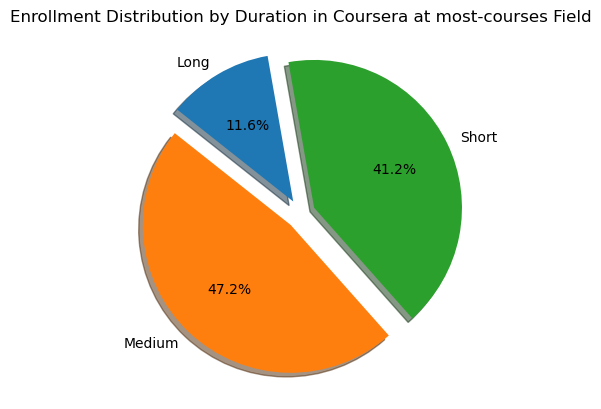

In [9]:
explode = (0.1, 0.1, 0.1)  
fig, ax = plt.subplots()
ax.pie(en_du_df['average_enrollment'], explode=explode, labels=en_du_df.index, autopct='%1.1f%%',shadow={'ox': -0.05, 'edgecolor': 'none', 'shade': 1}, startangle=100)
plt.title('Enrollment Distribution by Duration in Coursera at most-courses Field')
plt.show()

## Question 2: Evaluate the courses offered by university if the recommend is good or not

In [3]:
avg_rating = df['rating'].mean()
school_offer = df.groupby(['offered by'])['rating'].agg(['mean'])
school_offer.columns = ['average_rating']
school_offer = school_offer.sort_values(by='average_rating')
school_offer['rating_category'] = ['Lower' if x < avg_rating else 'Equal or Higher' for x in school_offer['average_rating']]
school_offer['comparing_rating'] = school_offer['average_rating'] - avg_rating
school_offer

,average_rating,rating_category,comparing_rating
offered by,,,
Databricks,3.700000,Lower,-0.922020
Illinois Tech,3.800000,Lower,-0.822020
NIIT,3.850000,Lower,-0.772020
National Academy of Sports Medicine,4.100000,Lower,-0.522020
USO,4.100000,Lower,-0.522020
...,...,...,...
Yale University,4.842857,Equal or Higher,0.220837
Deep Teaching Solutions,4.850000,Equal or Higher,0.227980
Curtis Institute of Music,4.900000,Equal or Higher,0.277980


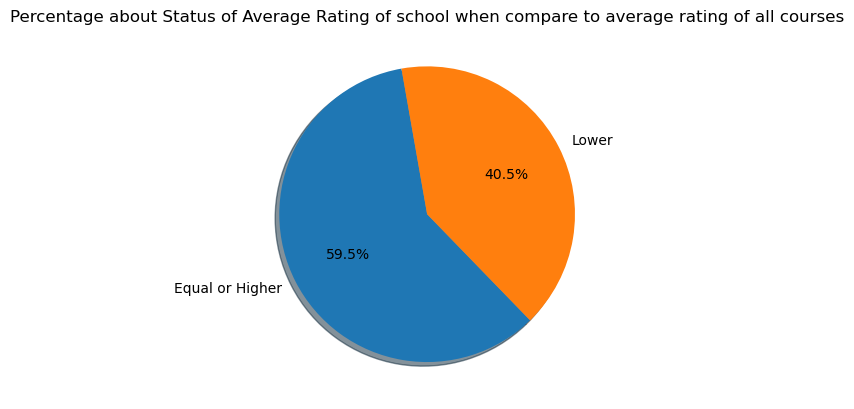

[]

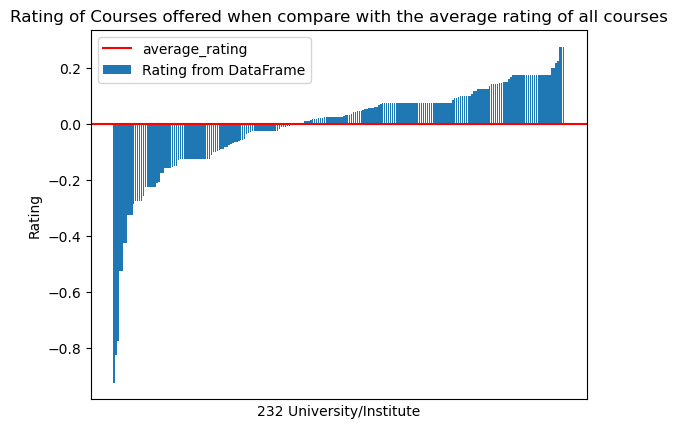

In [6]:
pie_offered = school_offer['rating_category'].value_counts()
fig, ax1 = plt.subplots()
ax1.pie(pie_offered.values, labels=pie_offered.index, autopct='%1.1f%%',shadow={'ox': -0.05, 'edgecolor': 'none', 'shade': 1}, startangle=100)
plt.title('Percentage about Status of Average Rating of school when compare to average rating of all courses')
plt.show()

fig, ax2 = plt.subplots()
ax2.bar(school_offer.index, school_offer['comparing_rating'], label='Rating from DataFrame')
ax2.axhline(y=0, color='red', linestyle='-', label='average_rating')
ax2.set_xlabel('University/Institute')
ax2.set_ylabel('Rating')
ax2.set_title('Rating of Courses offered when compare with the average rating of all courses')
ax2.legend()
ax2.set_xticks([])

## Question 3: Check the general level of learner in these years

In [8]:
general_level = df.groupby(['level'])['enrollment'].agg(['sum'])
general_level.columns = ['total_enrollment']
general_level

,total_enrollment
level,
Advanced,2138811
Beginner,40823920
Intermediate,15531503
Other,22831873


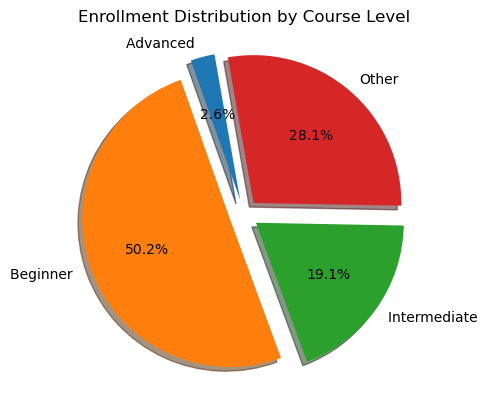

In [9]:
explode = (0.1, 0.1, 0.1, 0.1)  
fig, ax = plt.subplots()
ax.pie(general_level['total_enrollment'], explode=explode, labels=general_level.index, autopct='%1.1f%%',shadow={'ox': -0.05, 'edgecolor': 'none', 'shade': 1}, startangle=100)
plt.title('Enrollment Distribution by Course Level')
plt.show()